In [21]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
DATA_PATH = '../Data/'

electric_df = pd.read_csv(DATA_PATH + 'electric_df.csv', index_col = 0)
water_df = pd.read_csv(DATA_PATH + 'water_df.csv', index_col = 0)

In [8]:
electric_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.23,1.45,1.73,1.62,1.31,1.48,1.74,1.71,1.30,1.49,...,1.68,1.20,1.42,1.88,1.67,1.24,1.39,1.67,1.60,1.26
1,1.45,1.73,1.62,1.31,1.48,1.74,1.71,1.30,1.49,1.94,...,1.20,1.42,1.88,1.67,1.24,1.39,1.67,1.60,1.26,1.41
2,1.73,1.62,1.31,1.48,1.74,1.71,1.30,1.49,1.94,1.68,...,1.42,1.88,1.67,1.24,1.39,1.67,1.60,1.26,1.41,1.68
3,1.62,1.31,1.48,1.74,1.71,1.30,1.49,1.94,1.68,1.26,...,1.88,1.67,1.24,1.39,1.67,1.60,1.26,1.41,1.68,1.59
4,1.31,1.48,1.74,1.71,1.30,1.49,1.94,1.68,1.26,1.39,...,1.67,1.24,1.39,1.67,1.60,1.26,1.41,1.68,1.59,1.24


In [9]:
water_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,30,120,210,410,32,184,180,260,35,145,...,95,46,139,204,198,53,162,210,150,51
1,120,210,410,32,184,180,260,35,145,203,...,46,139,204,198,53,162,210,150,51,169
2,210,410,32,184,180,260,35,145,203,216,...,139,204,198,53,162,210,150,51,169,204
3,410,32,184,180,260,35,145,203,216,43,...,204,198,53,162,210,150,51,169,204,169
4,32,184,180,260,35,145,203,216,43,136,...,198,53,162,210,150,51,169,204,169,38


In [42]:
elec_scaler = MinMaxScaler().fit(electric_df)
water_scaler = RobustScaler().fit(water_df)

scaled_elec = elec_scaler.transform(electric_df)
scaled_water = water_scaler.transform(water_df)

In [43]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(scaled_water)

c:\Users\KDP-2\anaconda3\envs\Project_38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [53]:
# 3. 클러스터 레이블 (정상 패턴과 이상치를 구분하는 클러스터 레이블)
labels = kmeans.labels_

# 4. 각 클러스터의 중심
cluster_centers = kmeans.cluster_centers_

distances = kmeans.transform(scaled_water)  # 각 데이터 포인트와 클러스터 중심 간의 거리 계산
min_distances = np.min(distances, axis=1)  # 가장 가까운 클러스터 중심과의 거리 계산

# 임계값 설정 (예: 거리가 평균 + 2*표준편차 이상인 데이터는 이상치로 간주)
threshold = np.mean(min_distances) + 3.2 * np.std(min_distances)
outliers = min_distances > threshold

# 5. 정상 패턴과 이상치 구분 (일반적으로 중심이 더 가까운 클러스터가 정상 패턴)
normal_data = water_df[~outliers]  # 이상치가 아닌 데이터
outlier_data = water_df[outliers] 

# 7. 결과 출력
print(f"정상 패턴 데이터: {normal_data.shape[0]} 개")
print(f"이상치 데이터: {outlier_data.shape[0]} 개")

# 8. 정상 패턴과 이상치 레이블 출력
water_df['Cluster_Label'] = labels
print(water_df[['Cluster_Label']].head())  # 각 데이터의 클러스터 레이블 확인

정상 패턴 데이터: 339934 개
이상치 데이터: 66 개
   Cluster_Label
0              1
1              1
2              0
3              0
4              1


In [54]:
# 정상 데이터와 이상치 데이터 확인
print("정상 패턴 데이터:")
print(normal_data.head())  # 정상 데이터 일부 출력

print("\n이상치 데이터:")
print(outlier_data.head())  # 이상치 데이터 일부 출력

정상 패턴 데이터:
     0    1    2    3    4    5    6    7    8    9  ...   20   21   22   23  \
0   30  120  210  410   32  184  180  260   35  145  ...   46  139  204  198   
1  120  210  410   32  184  180  260   35  145  203  ...  139  204  198   53   
2  210  410   32  184  180  260   35  145  203  216  ...  204  198   53  162   
3  410   32  184  180  260   35  145  203  216   43  ...  198   53  162  210   
4   32  184  180  260   35  145  203  216   43  136  ...   53  162  210  150   

    24   25   26   27   28  Cluster_Label  
0   53  162  210  150   51              1  
1  162  210  150   51  169              1  
2  210  150   51  169  204              0  
3  150   51  169  204  169              0  
4   51  169  204  169   38              1  

[5 rows x 30 columns]

이상치 데이터:
          0    1    2    3    4    5    6    7    8    9  ...   20   21   22  \
105771  138   47  122  218  350   14  169   89   55   78  ...  121   62  151   
120385  130  135  138   47  122  218  350   38  183

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_3472\3560291953.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


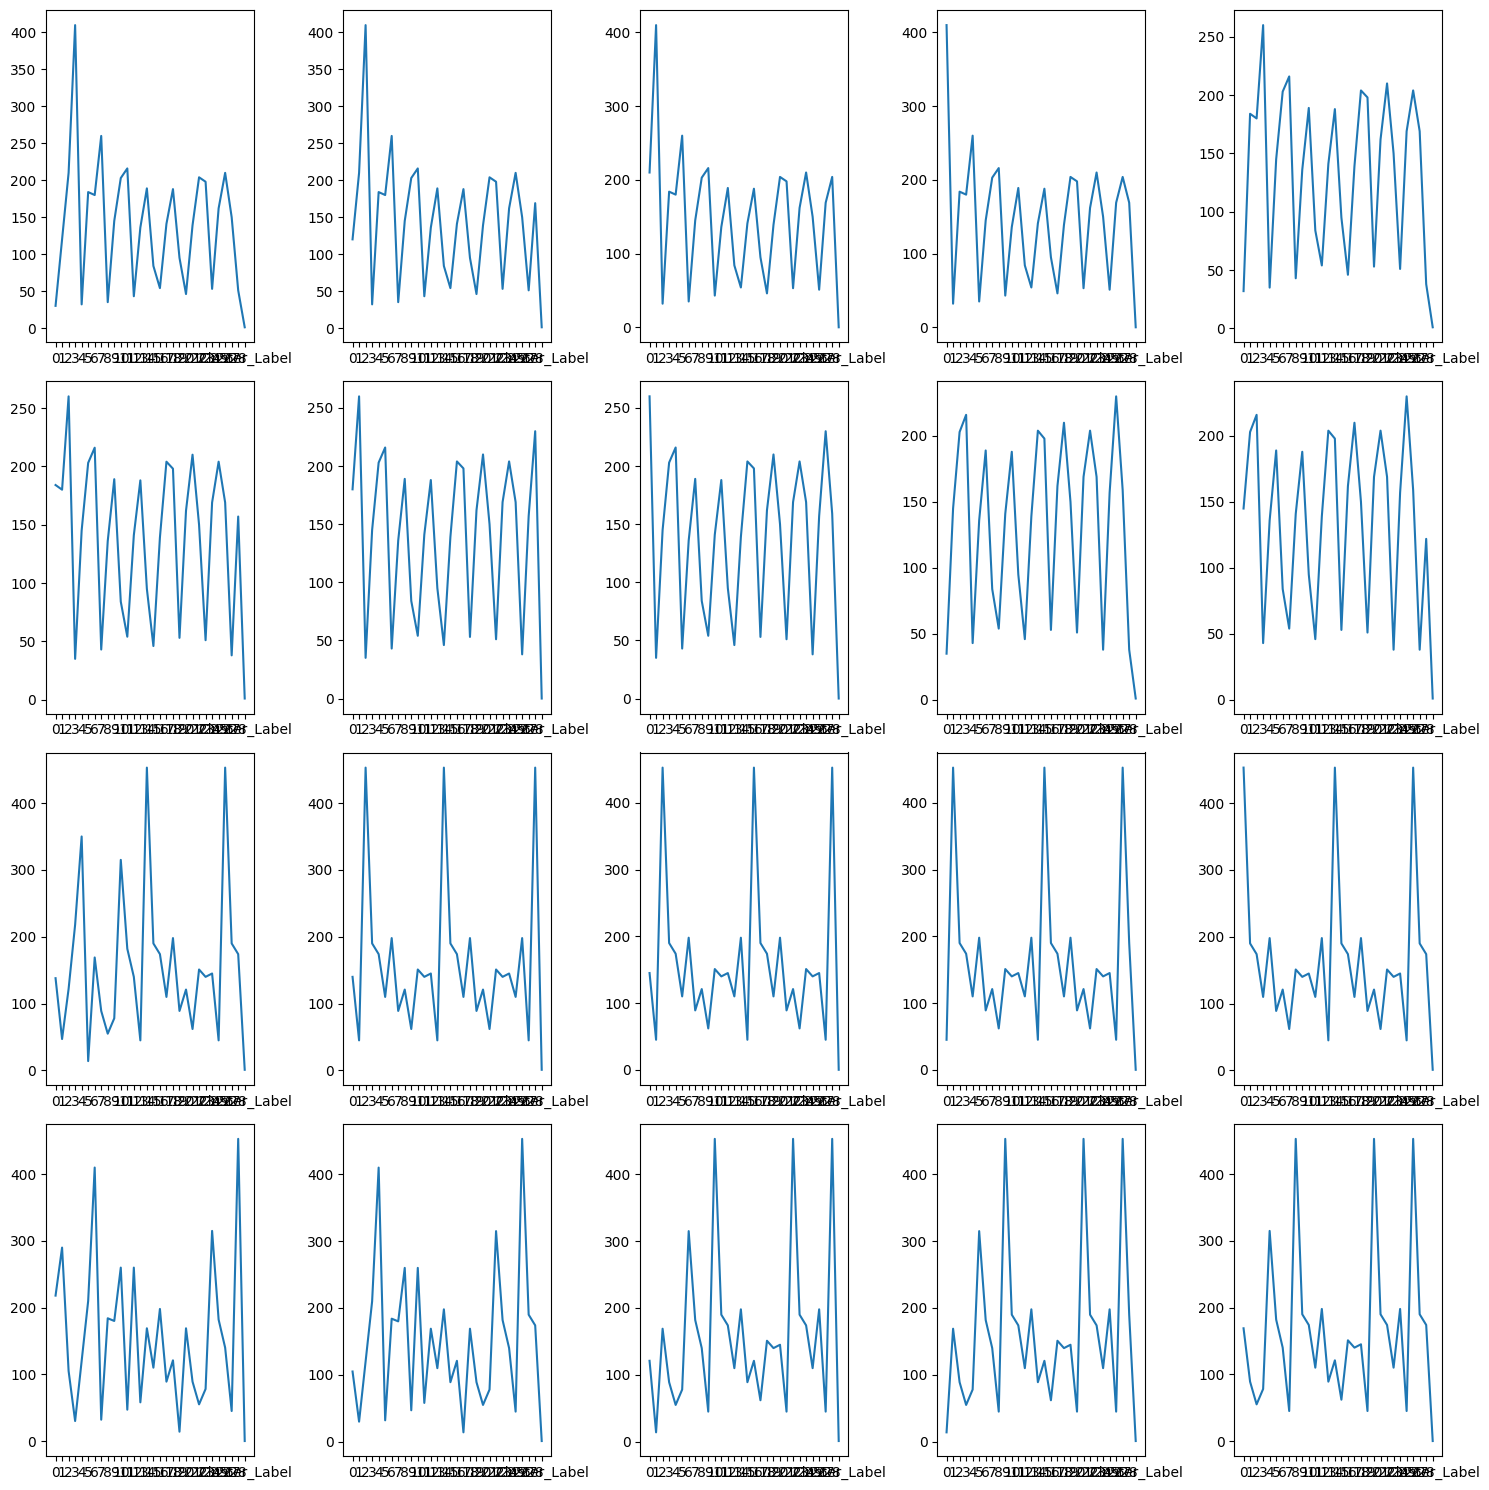

In [56]:
fig = plt.figure(figsize = (15, 15))
axes = fig.subplots(4, 5)

for i in range(5):
    axes[0][i].plot(normal_data.iloc[i])

for i in range(5):
    axes[1][i].plot(normal_data.iloc[5 + i])

for i in range(5):
    axes[2][i].plot(outlier_data.iloc[10 + i])

for i in range(5):
    axes[3][i].plot(outlier_data.iloc[15 + i])

fig.tight_layout()
fig.show()




In [57]:
from sklearn.ensemble import IsolationForest

# 데이터 전처리
data = pd.read_csv('../Data/water_df.csv')
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Isolation Forest 모델 학습
model = IsolationForest(contamination=0.1)  # contamination은 이상치 비율
model.fit(data_scaled)

# 이상치 탐지
outliers = model.predict(data_scaled)  # -1은 이상치, 1은 정상

# 이상치 제거
cleaned_data = data[outliers == 1]


ValueError: Item wrong length 10200000 instead of 340000.